<a href="https://colab.research.google.com/github/KimuYounguWoo/machine-learning-programming/blob/main/5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5-1 결정 트리
## 목표
1. 지금까지 배운, LR과 같은 단순 선형 분류 모델로 분류하기 힘든 데이터를 훈련할 수 있는 새로운 모델들
2. 결정 트리에 대해 배우고 사용해보기.

## 와인 분류 :: LR
RED, WHITE 와인을 함께 담아놓은 데이터셋을 이용해, RED, WHITE 와인을 분류하는 모델

### 데이터 준비

In [ ]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [ ]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


와인을 구분하는 3개의 특성(알콜, 당도, 산도)와 그 값인 Class가 존재(0, 1)

In [ ]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

데이터를 0.2 사이즈로 테스트 데이터로 분리하여 학습/테스트 데이터로 나눠준다.

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

너무 큰 수가 나와 오류가 생기는 걸 방지하기 위해 정규화

### LR 모델로 훈련

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [ ]:
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


과소적합이 나타났으며, 선형 방정식 계수와 절편으로는 이 모델이 의미하는 바를 쉽게 알아보기가 힘듦

### DT (결정 트리)
결정 트리는 주어진 특성에 대해 분기를 가지는 트리를 생성합니다. 이 트리를 진행할 수록, 어떤 타겟이 어떤 특성에 더 가중치를 두는 지 알 수 있습니다.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


과대 적합이 나타났습니다. 결정트리를 그래프로 확인해보겠습니다.

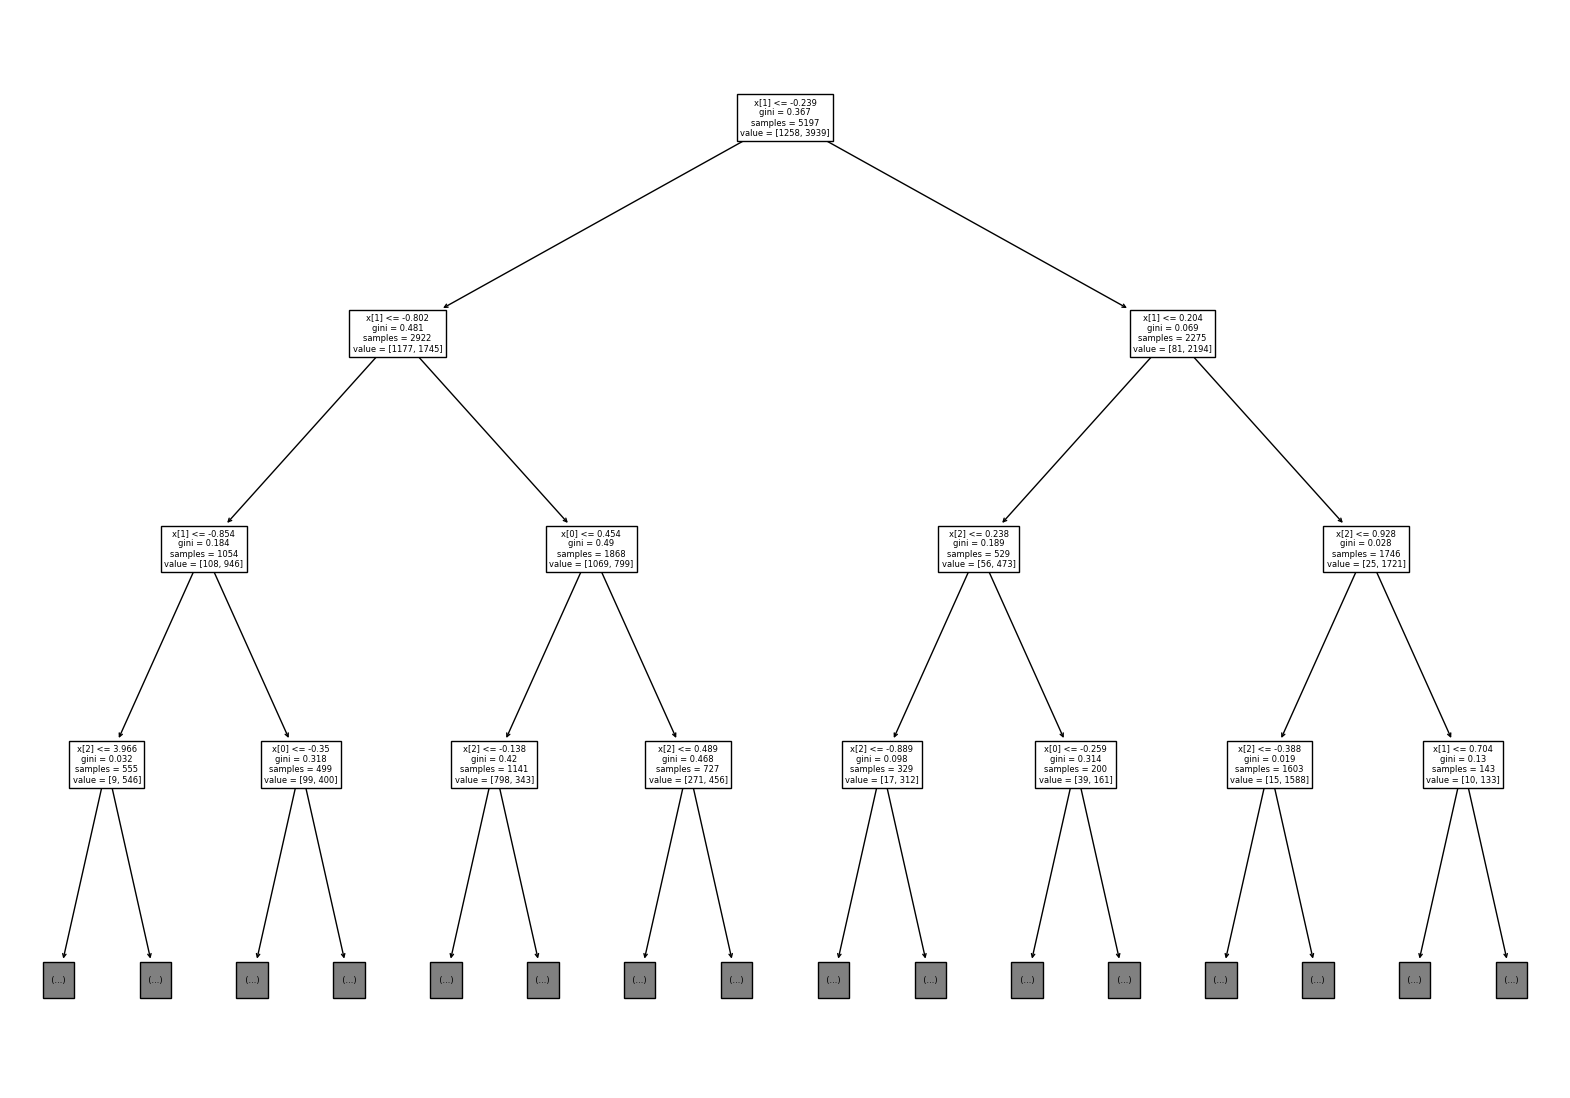

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,14))
plot_tree(dt, max_depth = 3)
plt.show()

x[i]는 특성의 이름입니다. 이렇게 보니까 보기 조금 불편하니 여러 파라미터를 추가하여 그래프를 다시 그려보겠습니다.

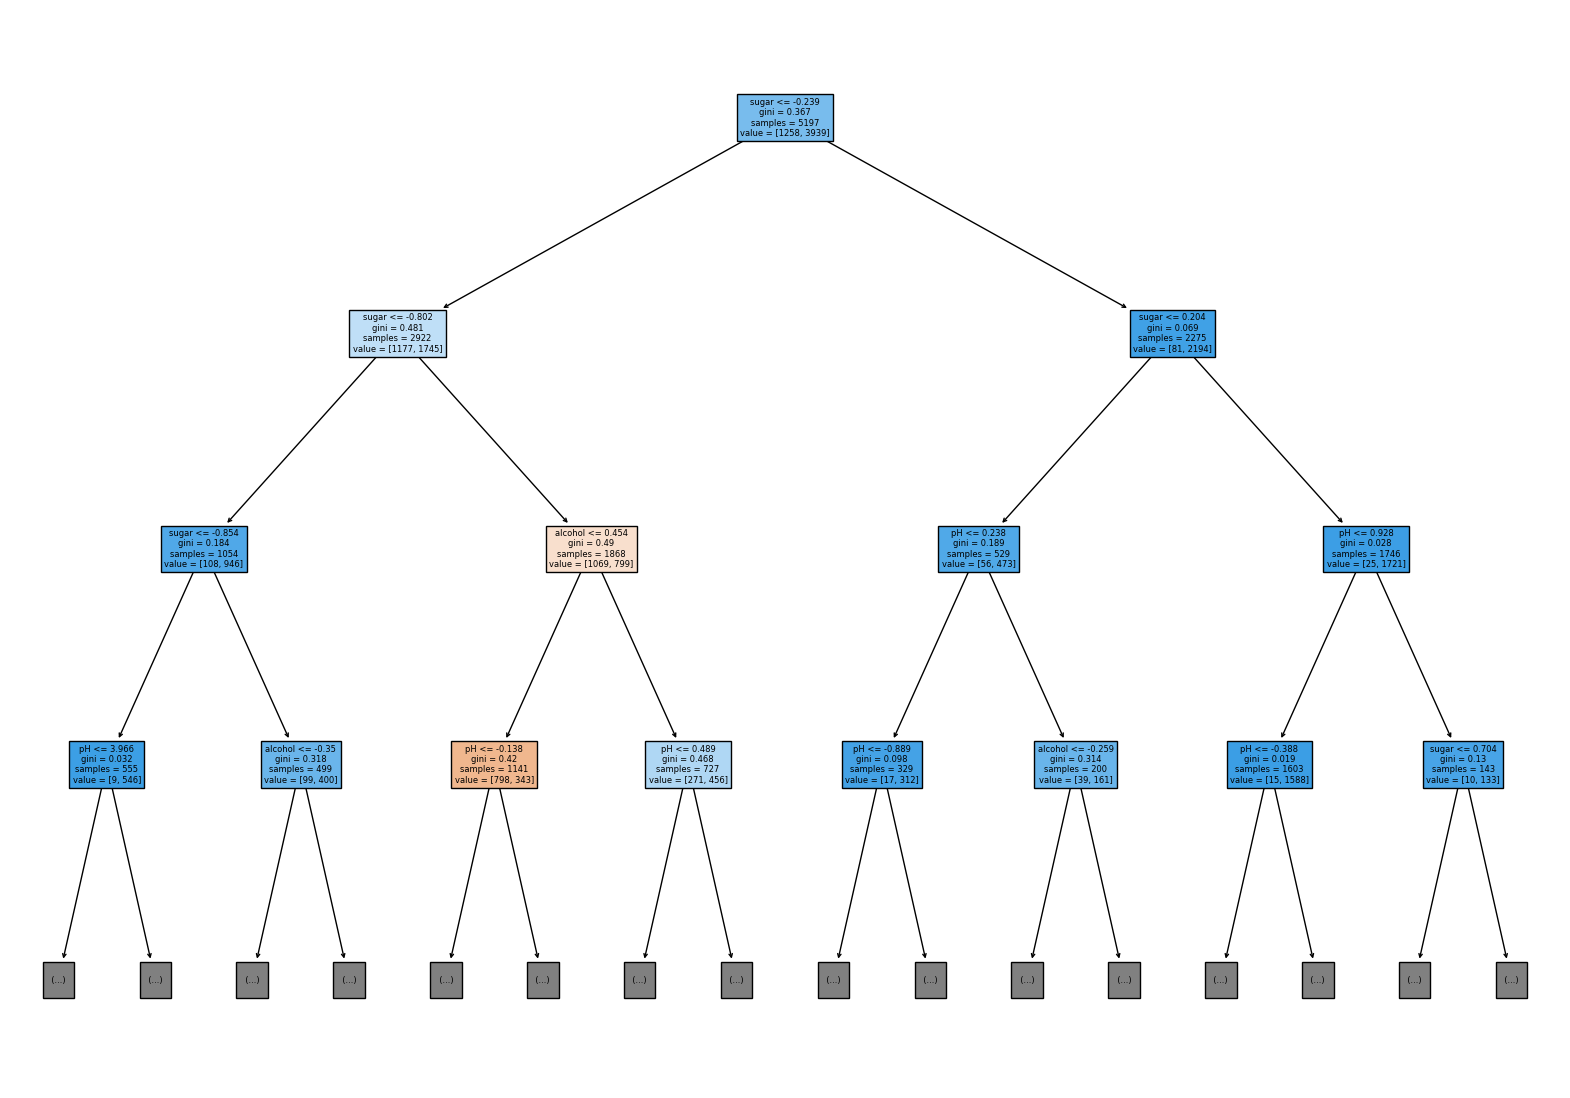

In [ ]:
plt.figure(figsize=(20, 14))
plot_tree(dt, max_depth=3, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

이제 좀 보기 좋은 그래프가 나왔습니다.<br>
먼저, 루트 노드부터 보면 당도가 -0.239 이하인지 질문을 합니다.<br>
여기서 만약 조건을 만족한다면 왼쪽으로 이동합니다.<br>
value는 현재 이 분기에 속해있는 샘플의 수입니다.<br>
여기서는 0, 음성 클래스는 1258개 양성 클래스(1)은 3939개를 가지고 이 분기를 확인합니다.

이런 식으로 리프 노드를 내려가고, 리프 노드에서 가장 많은 클래스가 바로 예측 클래스가 됩니다.

여기서 **gini**는 불순도를 의미합니다.
<br>어떤 특징의 어떤 값이 분할하는 기준을 정하는
```criterion```
의 값으로 현재 노드의 어떤 클래스들이 있는지 그 클래스들의 비율을 기준으로 불순도를 계산합니다.

하지만, 이런 식으로 무제한으로 리프가 생성된다면 학습 세트에만 과적합된 모델이 만들어집니다.<br>이를 해결하기 위해서 '가지치기'라고 불리는 작업을 통해 리프 노드의 생성을 제한할 필요가 있습니다.

In [ ]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


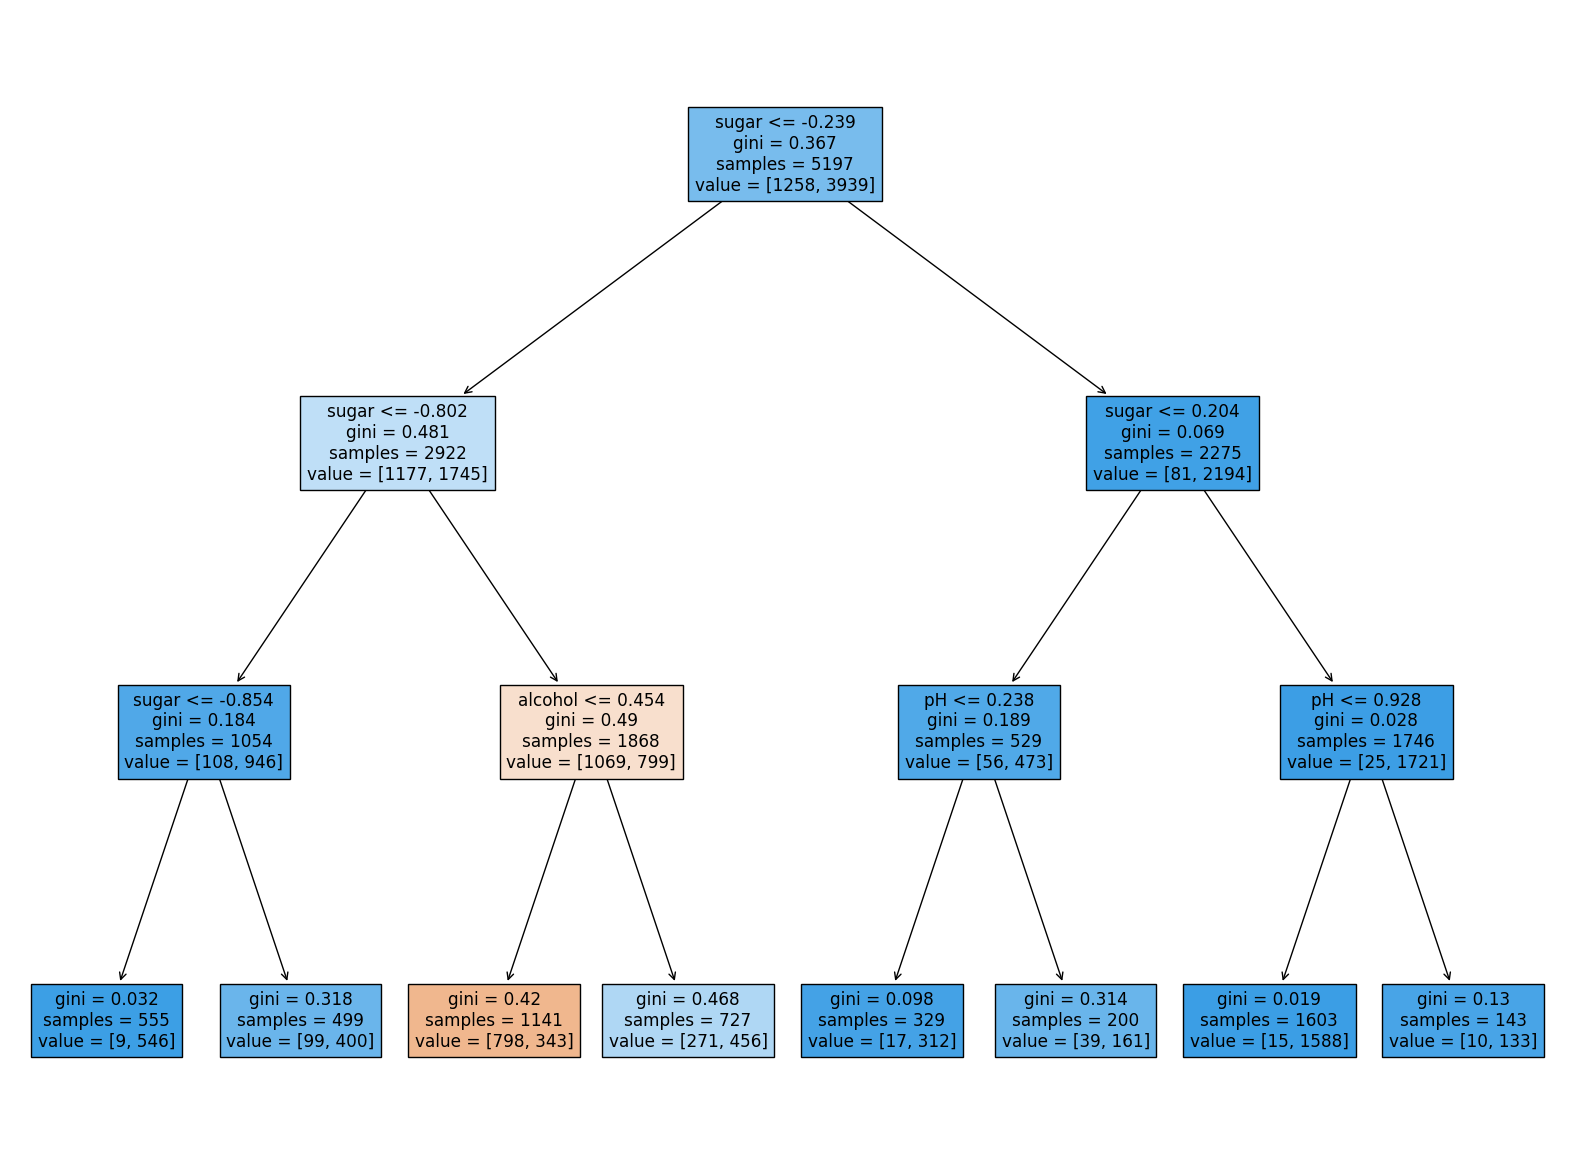

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()


깊이를 제한해서 사용하니, 조금 더 점수가 잘 나오네요<br>
그런데 잘 생각해보니, 당도가 음수로 나오는 것을 보여줍니다. 정규화를 진행하였기에 이런 일이 발생하는데, 결정 트리 알고리즘은 정규화를 하지 않아도 문제가 없습니다<br>그러니, 다시 정규화 전 데이터로 작업을 진행해보겠습니다.

In [ ]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


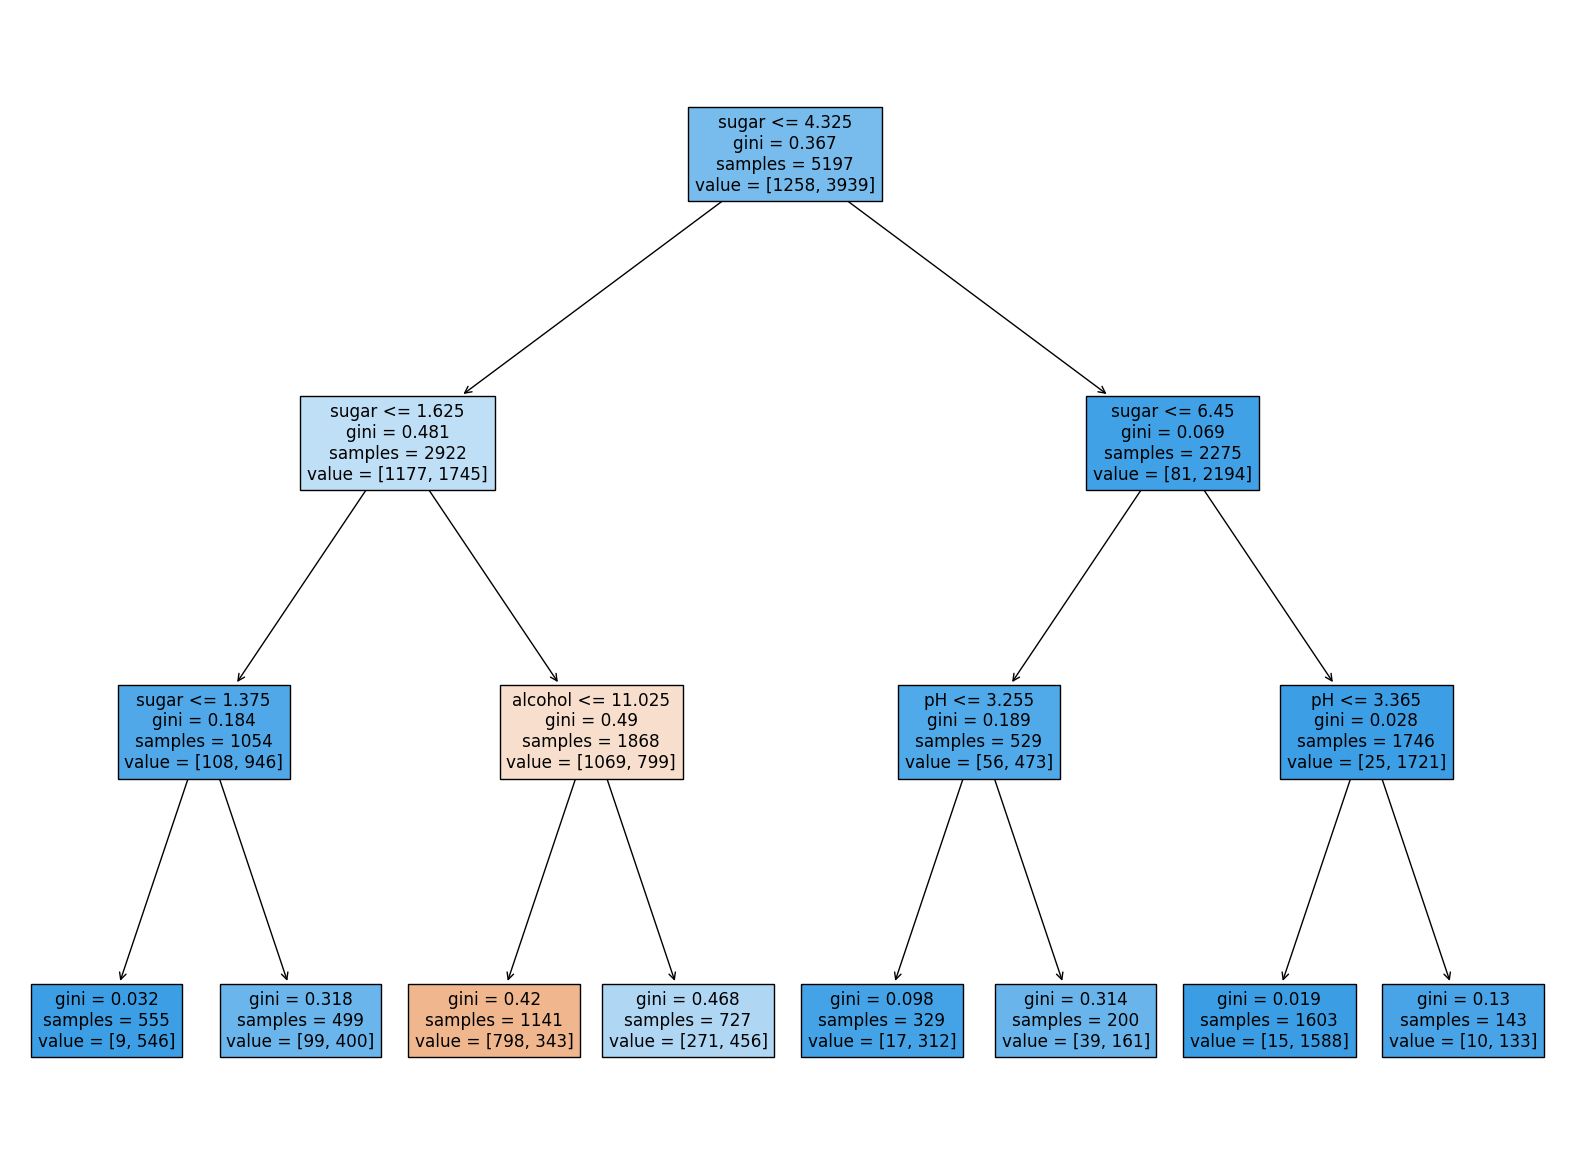

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

이제는 설명하기 쉬운 트리가 된 것 같습니다.<br>
**White**
1. 당도가 4.325이하 이고,
2. 당도가 1.625이상 이고,
3. 도수가 11.025이하 이면 White로 예측합니다.
<br>
또한 상위 노드에서 사용한 특성을 좀 더 중요한 특성이라고 봅니다

In [ ]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


이 함수는 결정 트리에서 어떤 특성이 유용한 특성이 되었는가를 알려줍니다.